In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
## Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
### Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

Dataset contains 1599 raws and 12 columns. Target variable is quality in this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All dependable variables are float64 data type and target variable is integer data type

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no any null values present in this dataset

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1) Count of all columns are same, it means there is no any missing values in this dataset
2) Mean value in 'fixed acidity', 'citric acid', 'resifual sugar', 'chlorides' & 'free sulfur dioxide' is more than 2nd    
   quartile(50%). It    mean there is right skewness present.
3) Min value in 'citric acid' is 0. Need to validate the data.
4) There is huge different between 75% and Max value in 'Residual sugar', 'free sulfur dioxide' and 'Total sulfur dioxide'. It      means there is outlier present in these columns. Need to check the outliers.
5) Standard divion is not proper in 'free sulfur dioxide' and 'total sulfur dioxide' columns. 

In [8]:
#Checking unique values in dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

There are 132 '0' values in 'citric acid' column. Othere columns look fine.


In [9]:
df.loc[df['citric acid']==0.00]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.0,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.0,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
7,7.3,0.650,0.0,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.5,0.900,0.0,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1461,6.2,0.785,0.0,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4
1550,7.1,0.680,0.0,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.5,5
1551,7.1,0.670,0.0,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5


In above dataset I can see 'o' values of rows in citric acid. I am going to replace 0 values with null values and then fill the null values with mean values. 

In [10]:
df['citric acid']=df['citric acid'].replace(0.00,np.nan)

In [11]:
df['citric acid'].value_counts()

0.49    68
0.24    51
0.02    50
0.26    38
0.10    35
        ..
0.72     1
0.62     1
0.75     1
1.00     1
0.78     1
Name: citric acid, Length: 79, dtype: int64

In [12]:
df.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [13]:
#Filling Null values in Citric Acid column
df['citric acid']=df['citric acid'].fillna(df['citric acid'].mean())

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Now I am going to convert quality columns values in two categories i.e. Good/1 and Not Good/0 quality.
df['quality']=df['quality'].replace([3,4,5,6],0)
df['quality']=df['quality'].replace([7,8],1)

In [16]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

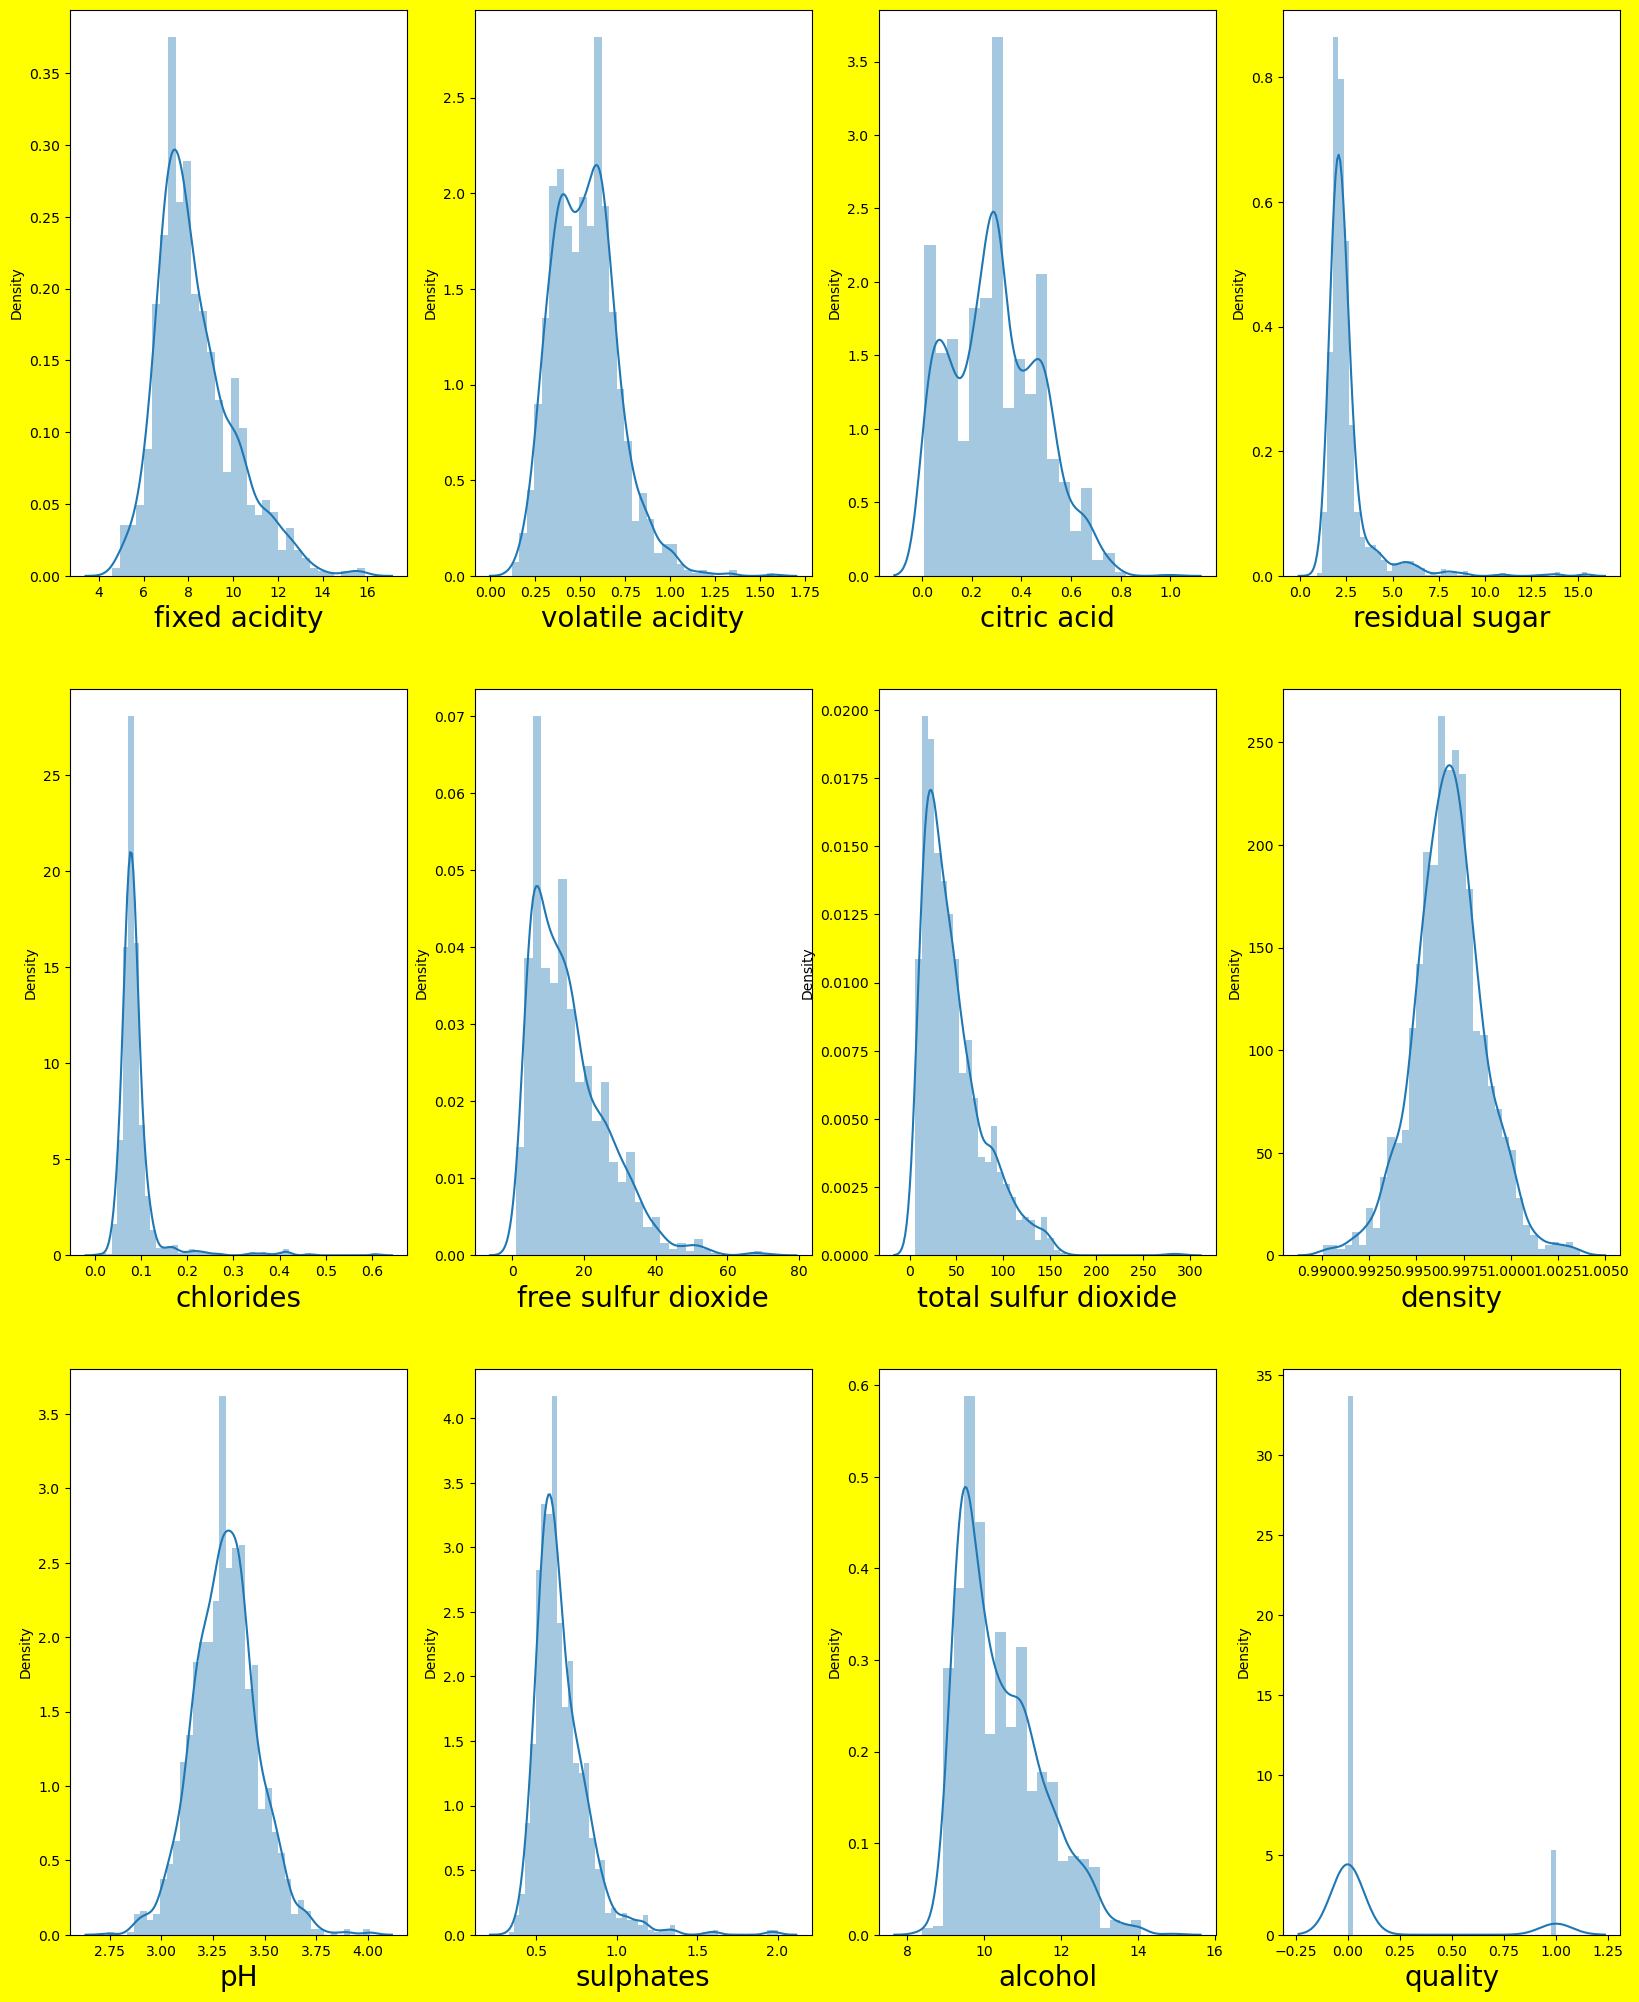

In [17]:
#Checking Outlier in the dataset
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

There are outlier present in column ‘fixed acidity’,’ volatile acidity’,’citric acid’,’residual sugar’,’chlrides’,’free sulphur dioxide’,’total sulphur dioxide’,’ph’,’sulphates’ &’alcohol’

In [18]:
data=df.drop('quality',axis=1)

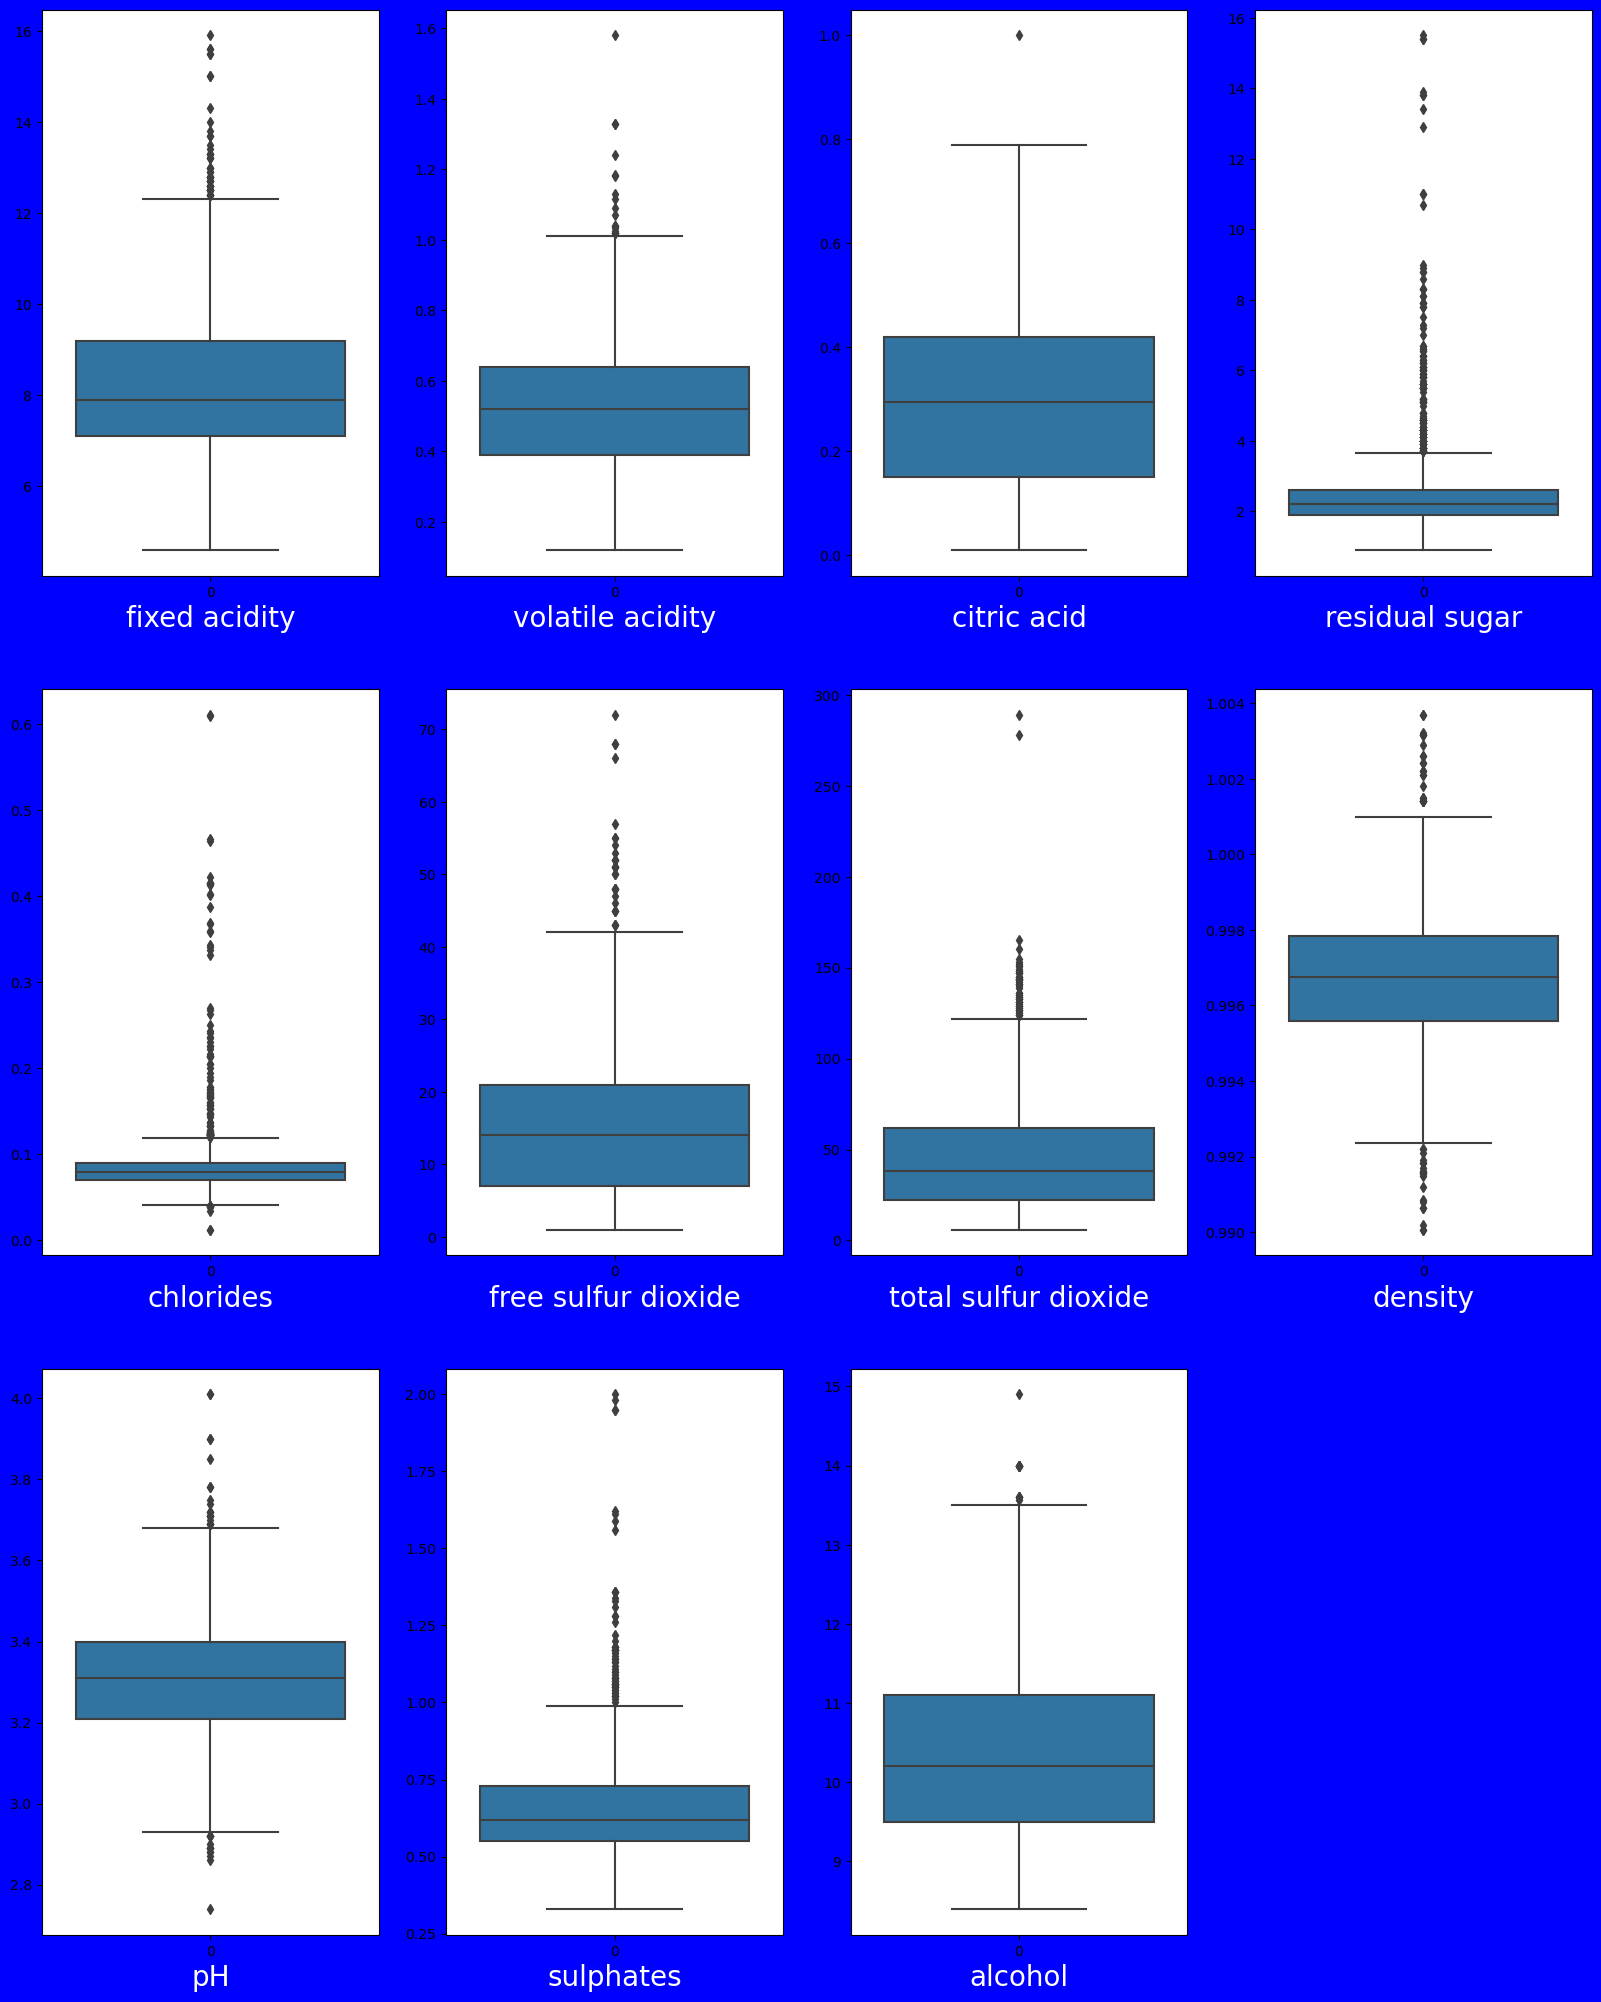

In [19]:
#Checking outlier using Boxplot

plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4, plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20, color='white')
        
    plotnumber+=1
plt.show()

As per box plot we can see there are outlier present in dataset as we have already identify in dist. plot. 
There are outlier presents in column like ‘fixed acidity’,’ volatile acidity’,’citric acid’,’residual sugar’,’chlrides’,’free sulphur dioxide’,’total sulphur dioxide’,’ph’,’sulphates’ &’alcohol’

In [20]:
# Let's transform out normal distibution data into z distribution by using z_score.
from scipy.stats import zscore

z_score=zscore(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol','pH']])

In [21]:
z_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,pH
0,-0.528360,0.961877,0.000000,-0.453218,-0.243707,-0.466193,-0.379133,-0.579207,-0.960246,1.288643
1,-0.298547,1.967442,0.000000,0.043416,0.223875,0.872638,0.624363,0.128950,-0.584777,-0.719933
2,-0.298547,1.297065,-1.442982,-0.169427,0.096353,-0.083669,0.229047,-0.048089,-0.584777,-0.331177
3,1.654856,-1.384443,1.495446,-0.453218,-0.264960,0.107592,0.411500,-0.461180,-0.584777,-0.979104
4,-0.528360,0.961877,0.000000,-0.453218,-0.243707,-0.466193,-0.379133,-0.579207,-0.960246,1.288643
...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-1.216949,-0.382271,0.053845,1.542054,-0.075043,-0.461180,0.072294,0.899886
1595,-1.390155,0.123905,-1.103933,-0.240375,-0.541259,2.211469,0.137820,0.601055,0.729364,1.353436
1596,-1.160343,-0.099554,-0.934408,-0.169427,-0.243707,1.255161,-0.196679,0.542042,0.541630,0.705508
1597,-1.390155,0.654620,-0.990916,-0.382271,-0.264960,1.542054,-0.075043,0.305990,-0.209308,1.677400


In [22]:
abs_z_score=np.abs(z_score)

In [23]:
filter_entry=(abs_z_score<3).all(axis=1)

In [24]:
df=df[filter_entry]

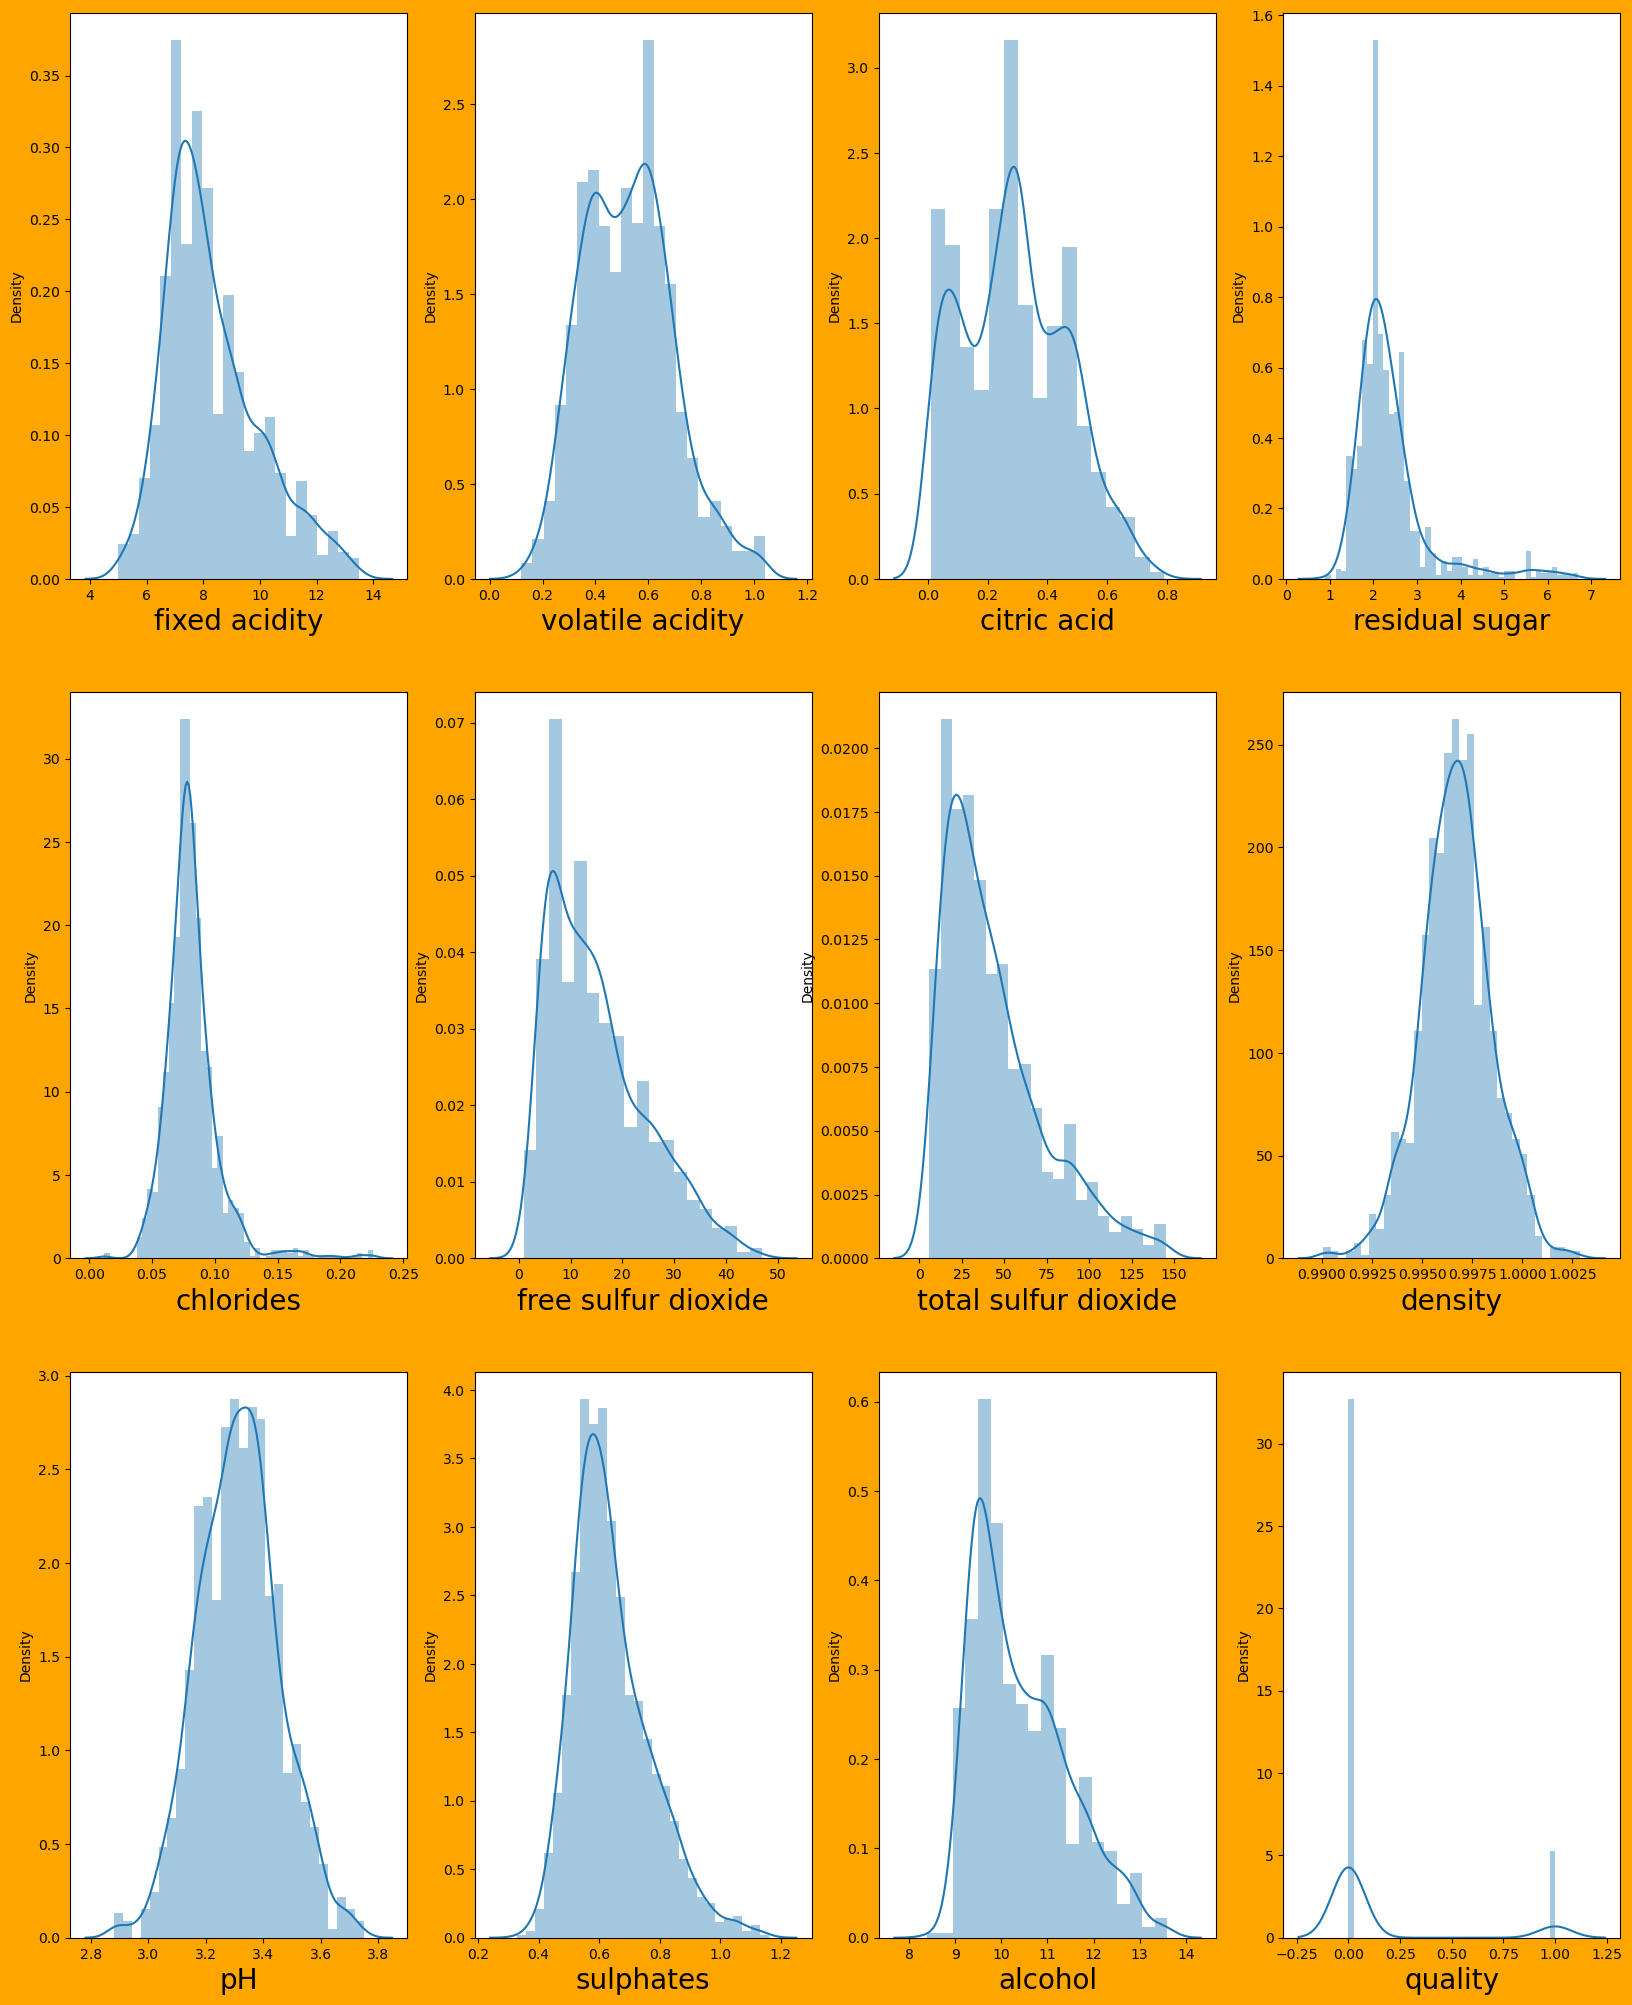

In [25]:
#Checking Outlier again after zscore implementing
plt.figure(figsize=(20,25), facecolor='orange')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

Now Dataset is looking good after appling Zscore.Outliers are removed in all columns 

In [26]:
df.shape

(1465, 12)

After applying Zscore I have lost 134 records from database. 

In [27]:
# Now checking multicollinearity issue by using correlation matrix 
df_corr=df.corr().abs()

<Axes: >

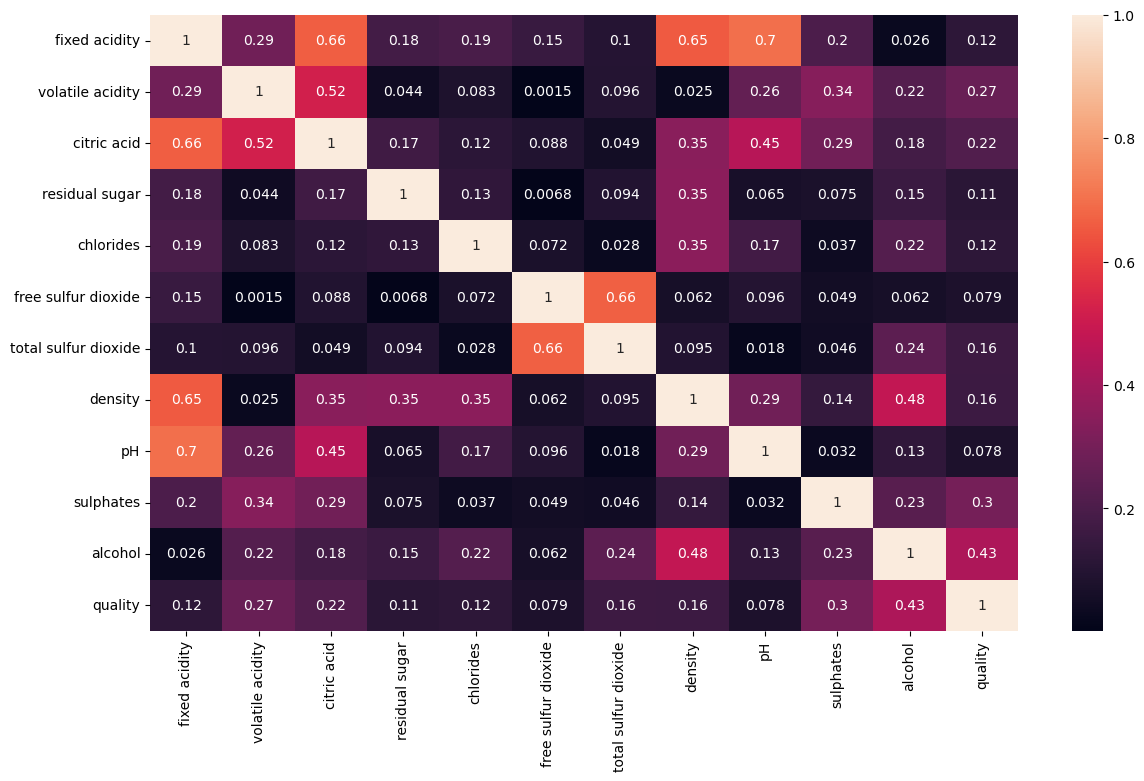

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

As per heatmap we can't find any multicollinerarity problem. Now We will crosscheck by using VIF method for checking multicollinerarity problem

In [29]:
x=df.drop('quality', axis=1)
y=df.quality

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,84.166447,fixed acidity
1,16.775130,volatile acidity
2,9.081586,citric acid
3,9.683487,residual sugar
4,17.731402,chlorides
5,6.977796,free sulfur dioxide
6,6.681485,total sulfur dioxide
7,1684.717975,density
8,1215.501995,pH
9,31.471713,sulphates


As per above table we can see Density and pH variables have high vif value. In this case We will drop only density column because it contain highest value

In [31]:
x.drop('density', axis=1, inplace=True)

In [32]:
#Again chcking VIF value after removing density column
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,42.041254,fixed acidity
1,16.772624,volatile acidity
2,8.959037,citric acid
3,9.604185,residual sugar
4,17.185167,chlorides
5,6.942036,free sulfur dioxide
6,6.367633,total sulfur dioxide
7,182.894760,pH
8,31.352984,sulphates
9,131.978234,alcohol


In [33]:
#Need to remove 'ph' coloumn also as it is highly correlated with other features
x.drop('pH', axis=1, inplace=True)

In [44]:
x.shape

(1465, 9)

Now there are 1465 columns adn 9 features remain. I will check the count of target feature

0    1262
1     203
Name: quality, dtype: int64


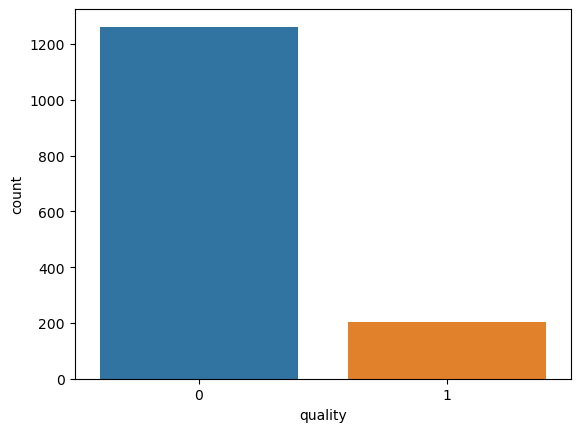

In [34]:
ax=sns.countplot(x='quality', data=df)
print(df['quality'].value_counts())

There is imbalance in quality data. Need to use over sampling technique to balance the data

In [35]:
from collections import Counter

In [45]:
y=df.quality

In [57]:
Counter(df['quality'])

Counter({0: 1262, 1: 203})

In [36]:
from imblearn.over_sampling import SMOTE

In [47]:
from sklearn.model_selection import train_test_split

In [50]:
sm=SMOTE(random_state=100,k_neighbors=3, sampling_strategy=0.80)

In [86]:
x1,y1=sm.fit_resample(x,y)

In [97]:
print('The number of classes before fit{}'.format(Counter(y)))
print('The number of classes after fit{}'.format(Counter(y1)))

The number of classes before fitCounter({0: 1262, 1: 203})
The number of classes after fitCounter({0: 1262, 1: 1009})


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [89]:
mxacc=0
mxrs=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x1, y1, test_size=0.25, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>mxacc:
        mxacc=acc
        mxrs=i
print("Best Accuracy score is :", mxacc, "at Random_state :", mxrs)

Best Accuracy score is : 0.954225352112676 at Random_state : 67


In [85]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=142)

In [107]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'Accuracy Score:{accuracy_score(y_test,ypred)*100:2f}%')
            
        print("\n\nTest Classification Report\n", classification_report(y_test,ypred, digits=2))

In [108]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [109]:
metric_score(rfc,x_train, x_test, y_train, y_test, train=True)
metric_score(rfc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:100.000000%

===============================test result==============
Accuracy Score:93.661972%


Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       295
           1       0.92      0.95      0.94       273

    accuracy                           0.94       568
   macro avg       0.94      0.94      0.94       568
weighted avg       0.94      0.94      0.94       568



In [111]:
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [113]:
metric_score(etc,x_train, x_test, y_train, y_test, train=True)
metric_score(etc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:100.000000%

===============================test result==============
Accuracy Score:94.014085%


Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       295
           1       0.93      0.95      0.94       273

    accuracy                           0.94       568
   macro avg       0.94      0.94      0.94       568
weighted avg       0.94      0.94      0.94       568



In [114]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [115]:
metric_score(lr,x_train, x_test, y_train, y_test, train=True)
metric_score(lr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:81.268350%

===============================test result==============
Accuracy Score:83.802817%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       295
           1       0.83      0.84      0.83       273

    accuracy                           0.84       568
   macro avg       0.84      0.84      0.84       568
weighted avg       0.84      0.84      0.84       568



In [116]:
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [117]:
metric_score(svc,x_train, x_test, y_train, y_test, train=True)
metric_score(svc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:72.342924%

===============================test result==============
Accuracy Score:70.950704%


Test Classification Report
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       295
           1       0.74      0.62      0.67       273

    accuracy                           0.71       568
   macro avg       0.71      0.71      0.71       568
weighted avg       0.71      0.71      0.71       568



In [118]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [119]:
metric_score(gbc,x_train, x_test, y_train, y_test, train=True)
metric_score(gbc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:94.304169%

===============================test result==============
Accuracy Score:90.669014%


Test Classification Report
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       295
           1       0.88      0.93      0.91       273

    accuracy                           0.91       568
   macro avg       0.91      0.91      0.91       568
weighted avg       0.91      0.91      0.91       568



In [120]:
abc=AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [121]:
metric_score(abc,x_train, x_test, y_train, y_test, train=True)
metric_score(abc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:88.608338%

===============================test result==============
Accuracy Score:86.091549%


Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       295
           1       0.85      0.86      0.86       273

    accuracy                           0.86       568
   macro avg       0.86      0.86      0.86       568
weighted avg       0.86      0.86      0.86       568



In [122]:
bc=BaggingClassifier()
bc.fit(x_train, y_train)

BaggingClassifier()

In [123]:
metric_score(bc,x_train, x_test, y_train, y_test, train=True)
metric_score(bc,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:99.588961%

===============================test result==============
Accuracy Score:91.197183%


Test Classification Report
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       295
           1       0.90      0.92      0.91       273

    accuracy                           0.91       568
   macro avg       0.91      0.91      0.91       568
weighted avg       0.91      0.91      0.91       568



In [125]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [126]:
metric_score(lr,x_train, x_test, y_train, y_test, train=True)
metric_score(lr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
Accuracy Score:81.268350%

===============================test result==============
Accuracy Score:83.802817%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       295
           1       0.83      0.84      0.83       273

    accuracy                           0.84       568
   macro avg       0.84      0.84      0.84       568
weighted avg       0.84      0.84      0.84       568



ExtraTreesClassifier giving best score. Now I will do cross validation on this model.

Scross Validation score is :  [0.95824176 0.87885463 0.95154185 0.85682819 0.91629956]
Mean of CV score is : 0.9123531974633294


In [130]:
score
mean

array([0.95824176, 0.87885463, 0.95154185, 0.85682819, 0.91629956])

In [ ]:
Scorss Validation score is less than 

In [136]:
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lr=LogisticRegression()
svc=SVC()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [142]:
models={'RandomForestClassifier':rfc, 'ExtraTreesClassifier':etc, 'LogisticRegression':lr, 'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc  }

Thresholds of : RandomForestClassifier [2.   1.   0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87
 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.77 0.76 0.75 0.74 0.71 0.7  0.69
 0.68 0.66 0.65 0.64 0.63 0.6  0.59 0.58 0.57 0.56 0.55 0.51 0.48 0.47
 0.45 0.43 0.41 0.39 0.38 0.37 0.36 0.35 0.34 0.3  0.29 0.28 0.27 0.26
 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12
 0.11 0.1  0.09 0.07 0.06 0.05 0.04 0.03 0.02 0.01 0.  ]
Thresholds of : ExtraTreesClassifier [2.   1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.9  0.89 0.88 0.87
 0.86 0.85 0.84 0.82 0.81 0.79 0.78 0.77 0.76 0.74 0.73 0.72 0.69 0.68
 0.66 0.65 0.64 0.63 0.62 0.6  0.59 0.58 0.57 0.56 0.55 0.52 0.5  0.49
 0.47 0.46 0.45 0.44 0.42 0.41 0.39 0.37 0.36 0.35 0.34 0.33 0.31 0.3
 0.28 0.27 0.26 0.25 0.24 0.23 0.2  0.18 0.17 0.16 0.14 0.12 0.11 0.1
 0.09 0.08 0.07 0.05 0.04 0.03 0.02 0.01 0.  ]
Thresholds of : LogisticRegression [1.98965855 0.98965855 0.9323021  0.93226444 0.92436993 0.92027828
 0.9164787

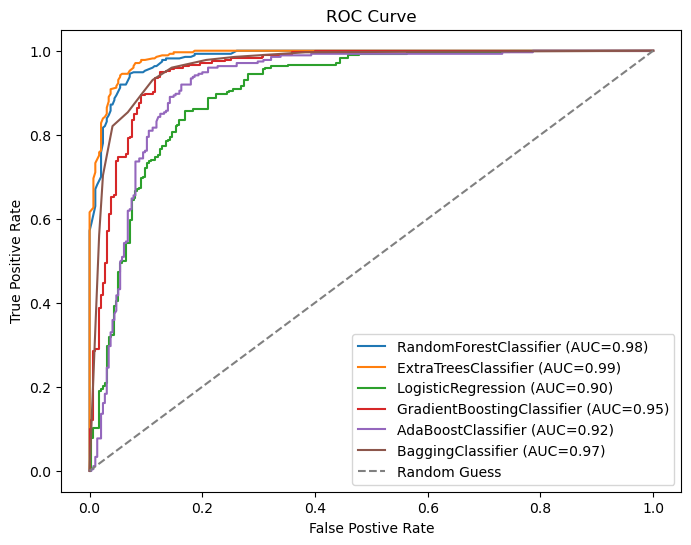

In [143]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(x_train, y_train)
    y_prob=model.predict_proba(x_test)[:,1]
    fpr, tpr,_=roc_curve(y_test, y_prob)
    print('Thresholds of :', name, _)
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr,tpr,label='{} (AUC={:.2f})'.format (name,roc_auc))

plt.plot([0,1], [0,1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [147]:
#Above ROC AUC curve is showing ExtraTreesClassifier is giving best score. I will cross validate the score on ExtraTreeClassifier as well as on RandomForestClassifier.
score=cross_val_score(etc, x1, y1)
print ("Scross Validation score is : ", score)
print('Mean of CV score is :', score.mean())

Scross Validation score is :  [0.96263736 0.87885463 0.94713656 0.85462555 0.91409692]
Mean of CV score is : 0.9114702038050055


In [145]:
ypred=etc.predict(x_test)

In [146]:
print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))

diffrent Between Accuracy Score and CV score is : 0.02822817624145424


In [148]:
#Now I will cross validate the score on RandomForestClassifier .
score=cross_val_score(rfc, x1, y1)
print ("Scross Validation score is : ", score)
print('Mean of CV score is :', score.mean())

Scross Validation score is :  [0.94725275 0.8722467  0.92511013 0.85242291 0.89867841]
Mean of CV score is : 0.8991421794064965


In [149]:
ypred_rfc=rfc.predict(x_test)

In [150]:
print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred_rfc)-(score.mean()))

diffrent Between Accuracy Score and CV score is : 0.030435285382235833


Above score shows that best model is ExtraTreesClassifier. Now I will try to tune the model by using GridSearchCV

In [151]:
from sklearn.model_selection import GridSearchCV

In [159]:
grid_param={'criterion':['gini','entropy'],
      'random_state':[10,50],
      'max_depth':[0,20,35],
      'n_jobs':[-2,-1,1],
      'n_estimators':[10,55,150]}

In [160]:
gcv=GridSearchCV(ExtraTreesClassifier(),grid_param,cv=5)

In [161]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 35],
                         'n_estimators': [10, 55, 150], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50]})

In [162]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 55,
 'n_jobs': -2,
 'random_state': 10}

In [163]:
F_model=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=55,n_jobs=-2, random_state=10)

In [164]:
F_model.fit(x_train, y_train)
ypred=F_model.predict(x_test)
acc=accuracy_score(y_test, ypred)

In [165]:
acc

0.948943661971831

In [166]:
import pickle

In [169]:
pickle.dump(F_model, open('Red Wine Quality Prediction Project', 'wb'))

In [170]:
test_model=pickle.load(open('Red Wine Quality Prediction Project','rb'))

In [171]:
test_model.predict(x_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,